1.- Importacion de datos y standarizacion de nombre de columnas

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


dataset = pd.read_csv("./src/notebooks/data/market_basket_optimisation_data.csv")

dataset.head()





,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Analizando las correlaciones de manera gráfica

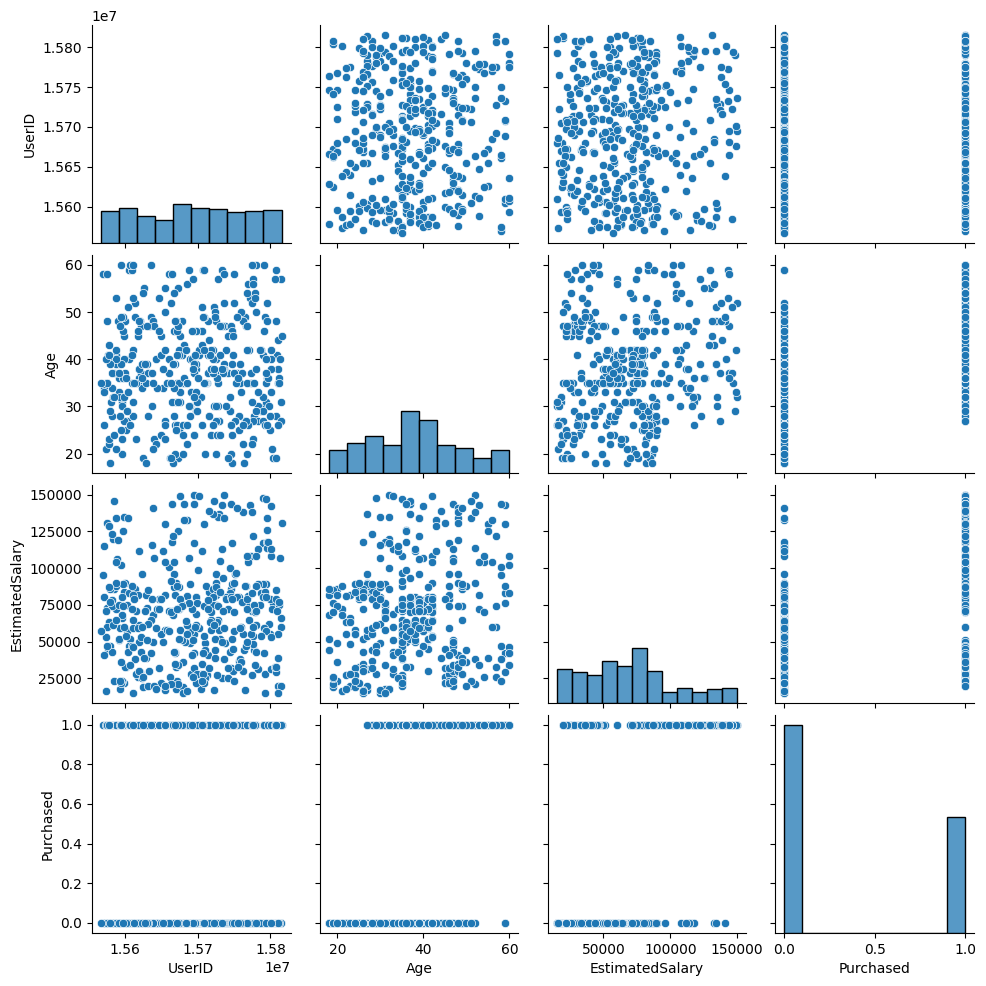

In [11]:
import matplotlib.pyplot  as plt
import seaborn as sns
sns.pairplot(dataset, height=2.5)
plt.show()

Analizando las correlaciones mediante un mapa de calor

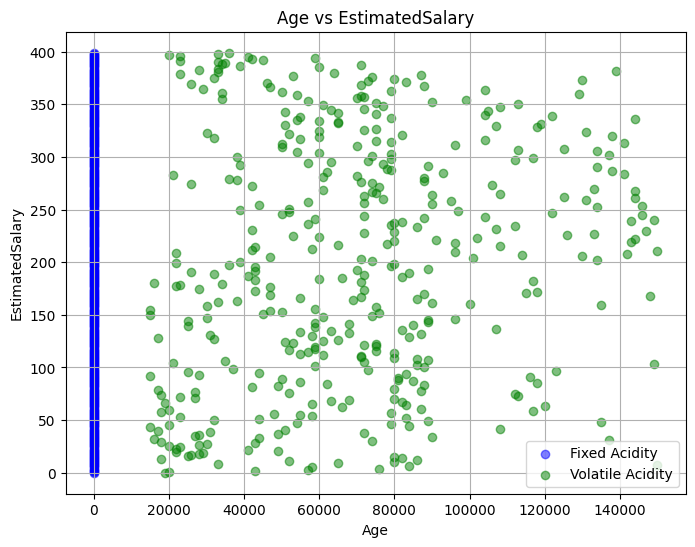

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

#'alcohol','quality' 'Age','EstimatedSalary'
# Extraer las características
x_graf = dataset["Age"]
y_graf = dataset["EstimatedSalary"]

# Graficar
# Graficar
plt.figure(figsize=(8, 6))

# Gráfico para fixed_acidity (en azul)
plt.scatter(x_graf, range(len(x_graf)), color='blue', alpha=0.5, label='Fixed Acidity')

# Gráfico para volatile_acidity (en verde)
plt.scatter(y_graf, range(len(y_graf)), color='green', alpha=0.5, label='Volatile Acidity')

# Configuración de leyendas y etiquetas
plt.title('Age vs EstimatedSalary')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.legend()

plt.grid(True)
plt.show()


In [13]:

x = dataset[["Age", "EstimatedSalary"]].values
y = dataset[["Purchased"]].values


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
y = y.ravel()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

x_scaler = StandardScaler()
X_train = x_scaler.fit_transform(X_train)
X_test = x_scaler.transform(X_test)



In [15]:
from sklearn.tree  import DecisionTreeClassifier
classifier =DecisionTreeClassifier(criterion="entropy",random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [16]:
y_pred = classifier.predict(X_test)

In [17]:
#Evaluacion del modelo con puntaje F1
from sklearn.metrics import f1_score, jaccard_score, confusion_matrix
y_pred = classifier.predict(X_test)
print("Puntaje F1", f1_score(y_test,y_pred,average='weighted'))
print("Puntaje Jaccard", jaccard_score(y_test,y_pred,pos_label=2,average='weighted'))
#Evaluacion del modelo con indice de Jaccard
cm = confusion_matrix(y_test,y_pred)


Puntaje F1 0.9109998877791493
Puntaje Jaccard 0.8380133432171979


/home/eyacelga/.virtualenvs/ai-proyecto-local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1561: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


/tmp/ipykernel_308802/246379527.py:31: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


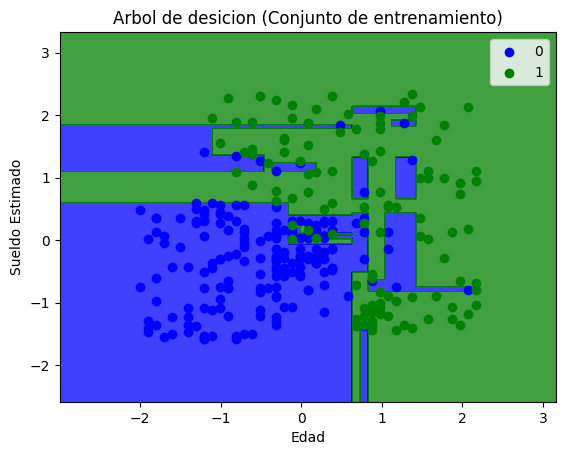

In [18]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

# Definir los conjuntos X_set y y_set
X_set, y_set = X_train, y_train

minimo_primera_columna = X_set[:, 0].min() -1
minimo_segunda_columna = X_set[:, 1].min() -1

maximo_primera_columna = X_set[:, 0].max() +1
maximo_segunda_columna = X_set[:, 1].max() +1
# Crear una malla de puntos para graficar las fronteras de decisión
X1, X2 = np.meshgrid(np.arange(start = minimo_primera_columna , stop = maximo_primera_columna , step = 0.01),
                     np.arange(start = minimo_segunda_columna , stop = maximo_segunda_columna , step = 0.01))

# Predecir las clases para cada punto en la malla
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

# Graficar las regiones de decisión
plt.contourf(X1, X2, Z, alpha = 0.75, cmap = ListedColormap(('blue', 'green')))



# Ajustar los límites de los ejes
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Graficar los puntos de entrenamiento
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(('blue', 'green'))(i), label = j)
# Agregar etiquetas y leyenda
plt.title('Arbol de desicion (Conjunto de entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()

# Mostrar el gráfico
plt.show()

/tmp/ipykernel_308802/707696355.py:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


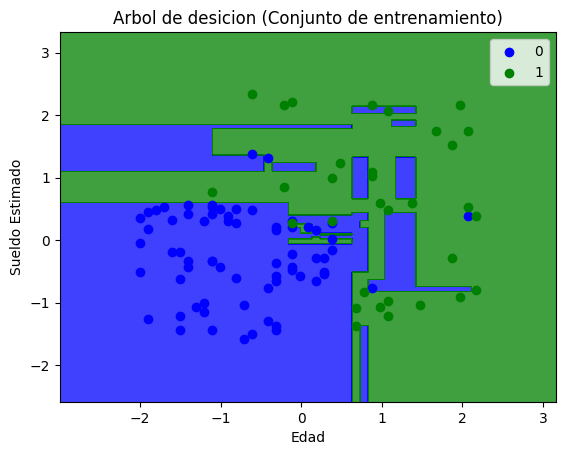

In [19]:
X_set, y_set = X_test, y_test

minimo_primera_columna = X_set[:, 0].min() -1
minimo_segunda_columna = X_set[:, 1].min() -1

maximo_primera_columna = X_set[:, 0].max() +1
maximo_segunda_columna = X_set[:, 1].max() +1
# Crear una malla de puntos para graficar las fronteras de decisión
X1, X2 = np.meshgrid(np.arange(start = minimo_primera_columna , stop = maximo_primera_columna , step = 0.01),
                     np.arange(start = minimo_segunda_columna , stop = maximo_segunda_columna , step = 0.01))

# Predecir las clases para cada punto en la malla
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

# Graficar las regiones de decisión
plt.contourf(X1, X2, Z, alpha = 0.75, cmap = ListedColormap(('blue', 'green')))



# Ajustar los límites de los ejes
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Graficar los puntos de entrenamiento
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(('blue', 'green'))(i), label = j)
# Agregar etiquetas y leyenda
plt.title('Arbol de desicion (Conjunto de entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()

# Mostrar el gráfico
plt.show()

5. Creacion del modelo como PKL

In [20]:
from joblib import dump
dump(classifier, './model/model-svm.pkl')

['./model/model-svm.pkl']